In [1]:
import SOLVING_QKE_FUNCTION as solve
import numpy as np
import derivatives as der

In [2]:
def make_ics_eqm(N, Emax, eta_e, eta_mu):
    eps= np.linspace(Emax/N, Emax, N)
    ym0 = np.zeros((N,4))
    
    rho_ee = 1/(np.exp(eps-eta_e)+1)
    rho_mm = 1/(np.exp(eps-eta_mu)+1)

    for i in range(len(ym0)):
        p0 = rho_ee[i] + rho_mm[i]
        pz = (rho_ee[i] - rho_mm[i]) / p0
        ym0[i,:] = [p0,0,0,pz]

    
    rhobar_ee = 1/(np.exp(eps+eta_e)+1)
    rhobar_mm = 1/(np.exp(eps+eta_mu)+1)
    
    
    ym0_bar= np.zeros((N,4))
    for i in range(len(ym0_bar)):
        p0= rhobar_ee[i] + rhobar_mm[i]
        pz = (rhobar_ee[i] - rhobar_mm[i]) / p0
        ym0_bar[i,:]= [p0,0,0,pz]
        
    return der.newarray_maker(ym0,ym0_bar)

In [3]:
%%time
T = [0.12, 0.25, 0.44, 1, 2, 4, 8]
foldername = "DataRun3"
basename = "Run"

eta_e = 0.1
eta_mu = -0.1

y0 = make_ics_eqm(200,10,eta_e, eta_mu)

CPU times: user 334 ms, sys: 22.7 ms, total: 357 ms
Wall time: 364 ms


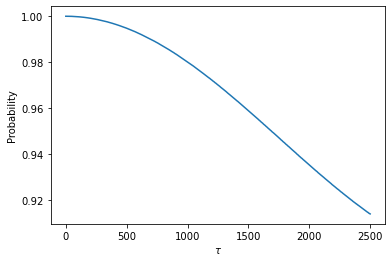

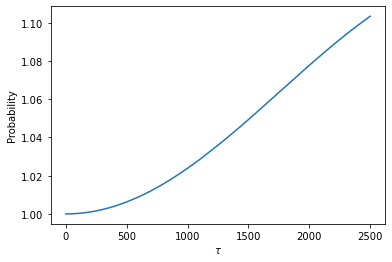

Data saved to file DataRun3/Run23-longer.npz
528 time steps saved with dN = 33060
incl_thermal_term True
incl_anti_neutrinos True
incl_collisions False
incl_eta True
eta_e 0.1
eta_mu -0.1
N 200
eps_max 10
delta m-squared 2.5e-15
sin^2 (2theta) 0.8
T 1
CPU times: user 9h 49min 16s, sys: 1min, total: 9h 50min 16s
Wall time: 9h 51min 1s


In [4]:
%%time
solve.solve_QKE(T[3], y0, True, True, foldername, "Run2{}-longer".format(3), incl_collisions=False, incl_eta=True, eta_e = eta_e, eta_mu = eta_mu, tau_final=2500) 

In [4]:
npz = np.load("{}/Run2{}-longer.npz".format(foldername,3),allow_pickle=True)
r = npz['raw'].item()
time = r['time']
dt = r['dt']
nu3D = r['nu3D']
nubar3D = r['nubar3D']
y1 = der.newarray_maker(nu3D[-1], nubar3D[-1])

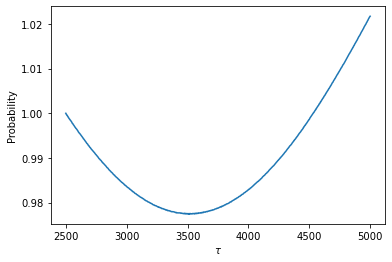

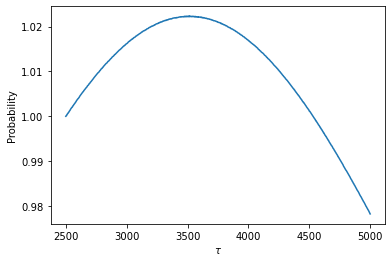

Data saved to file DataRun3/Run23-longer-contd.npz
753 time steps saved with dN = 22245
incl_thermal_term True
incl_anti_neutrinos True
incl_collisions False
incl_eta True
eta_e 0.1
eta_mu -0.1
N 200
eps_max 10
delta m-squared 2.5e-15
sin^2 (2theta) 0.8
T 1
CPU times: user 7h 55min 23s, sys: 43 s, total: 7h 56min 6s
Wall time: 7h 55min 45s


In [5]:
%%time
solve.solve_QKE(T[3], y1, True, True, foldername, "Run2{}-longer-contd".format(3), incl_collisions=False, incl_eta=True, eta_e = eta_e, eta_mu = eta_mu, tau_final=5000, t0 = time[-1], dt_init=dt[-1])

In [6]:
npz = np.load("{}/Run2{}-longer-contd.npz".format(foldername,3),allow_pickle=True)
r = npz['raw'].item()
time = r['time']
dt = r['dt']
nu3D = r['nu3D']
nubar3D = r['nubar3D']
y1 = der.newarray_maker(nu3D[-1], nubar3D[-1])

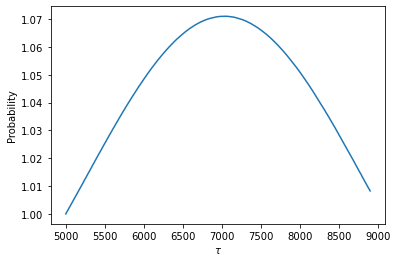

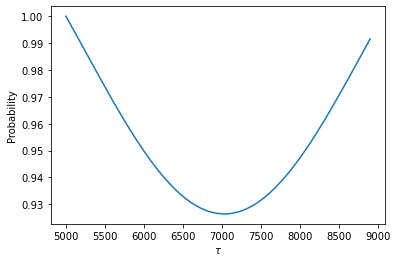

Data saved to file DataRun3/Run23-longer-contd-more.npz
1001 time steps saved with dN = 27330
incl_thermal_term True
incl_anti_neutrinos True
incl_collisions False
incl_eta True
eta_e 0.1
eta_mu -0.1
N 200
eps_max 10
delta m-squared 2.5e-15
sin^2 (2theta) 0.8
T 1
CPU times: user 12h 53min 14s, sys: 2min 43s, total: 12h 55min 57s
Wall time: 12h 53min 25s


In [7]:
%%time
solve.solve_QKE(T[3], y1, True, True, foldername, "Run2{}-longer-contd-more".format(3), incl_collisions=False, incl_eta=True, eta_e = eta_e, eta_mu = eta_mu, tau_final=10000, t0 = time[-1], dt_init=dt[-1])